# Análise Exploratória de dados com Pandas

In [ ]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

#Setar o estilo do gráfico
plt.style.use("seaborn")

In [3]:
#Upload de arquivos
#Dessa maneira você consegue importar o arquivo direto do seu diretório mas esse arquivo é temporário, não fica armazenado
from google.colab import files
base = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks (1).xlsx


In [4]:
#Criando o dataframe
df = pd.read_excel("AdventureWorks.xlsx")

In [22]:
#Quantidade de linhas e colunas
df.shape

(904, 18)

In [24]:
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [ ]:
#Tipos de dados das colunas
df.dtypes

In [11]:
#Receita total
df["Valor Venda"].sum()

5984606.1426

In [ ]:
#Criando a coluna de custo
df["Custo"] = df["Quantidade"].mul(df['Custo Unitário'])


In [17]:
#Custo total
round(df["Custo"].sum(), 2)

2486783.05

In [21]:
#Criando coluna de lucro
df["Lucro"] = df["Valor Venda"] - df['Custo']
round(df["Lucro"].sum(), 2)

3497823.09

In [28]:
#Tempo que demorou para envio do produto
df["Tempo Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Dias envio produto,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5 days,5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6 days,6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6 days,6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7 days,7


In [30]:
#Média de dias para envio por marca
df.groupby("Marca")["Tempo Envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo Envio, dtype: float64

In [34]:
#Lucro por ano e marca
#Configuração para melhorar visualização de valores numéricos
pd.options.display.float_format = '{:20,.2f}'.format

df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()



Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [36]:
#Resetando o index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano


,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [ ]:
#Quantidade de produtos vendidos em gráfico de barras horizontal
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Quantidade")
plt.ylabel("Produtos")

Text(0, 0.5, 'Lucro')

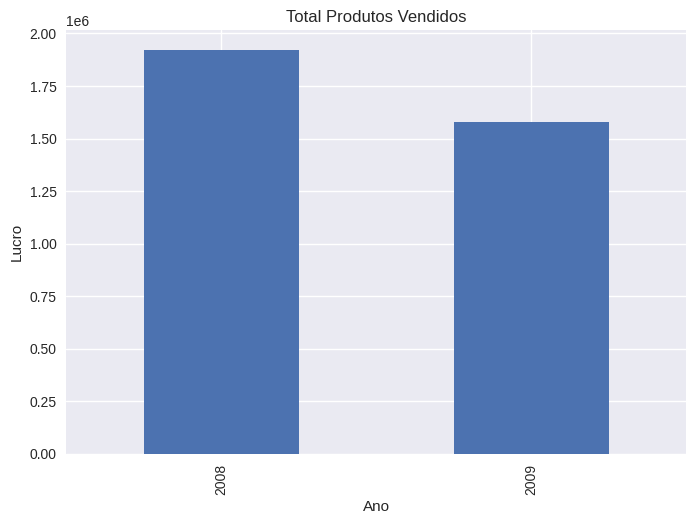

In [42]:
#Valor do lucro por ano
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro por Ano")
plt.xlabel("Ano")
plt.ylabel("Lucro")

In [45]:
#Vendas de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]
df_2009

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Dias envio produto,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12 days,12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11 days,11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12 days,12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13 days,13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4 days,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,2009-12-23,2009-12-30,199,1155,19033,200912234CS949,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","2,755.86",7 days,7
895,2009-01-11,2009-01-18,307,1155,19113,200901114CS680,324.69,980.00,6,882.00,"4,998.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","3,049.86",7 days,7
896,2009-03-04,2009-03-15,307,1155,19117,200903044CS706,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","2,755.86",11 days,11
897,2009-06-12,2009-06-22,307,1226,19126,200906124CS716,330.99,999.00,6,599.40,"5,394.60",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,985.94","3,408.66",10 days,10


Text(0, 0.5, 'Lucro')

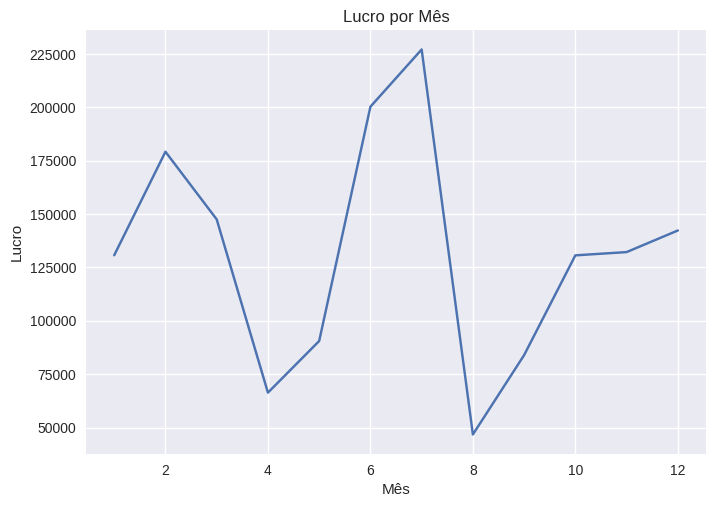

In [48]:
#Lucro de 2009 por mês
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title= "Lucro de 2019 por Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro")

(array([0, 1, 2]),
 [Text(0, 0, 'Adventure Works'),
  Text(1, 0, 'Contoso'),
  Text(2, 0, 'Fabrikam')])

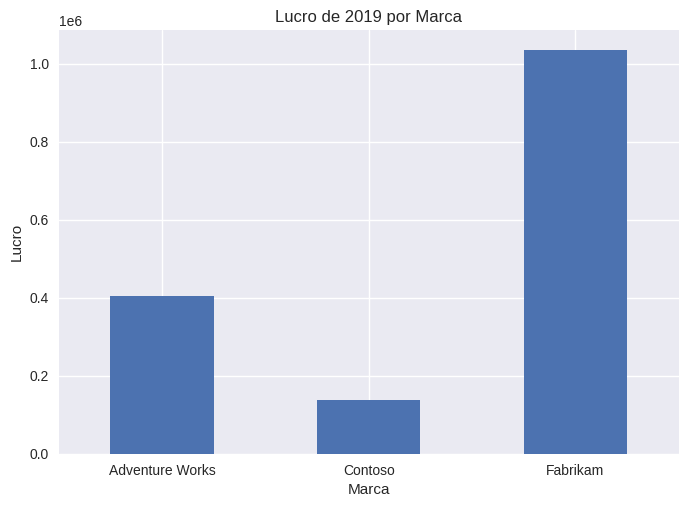

In [53]:
#Lucro de 2009 por marca
df_2009.groupby(df_2009["Marca"])["Lucro"].sum().plot.bar(title= "Lucro de 2019 por Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal")

(array([0, 1]), [Text(0, 0, 'Economy'), Text(1, 0, 'Regular')])

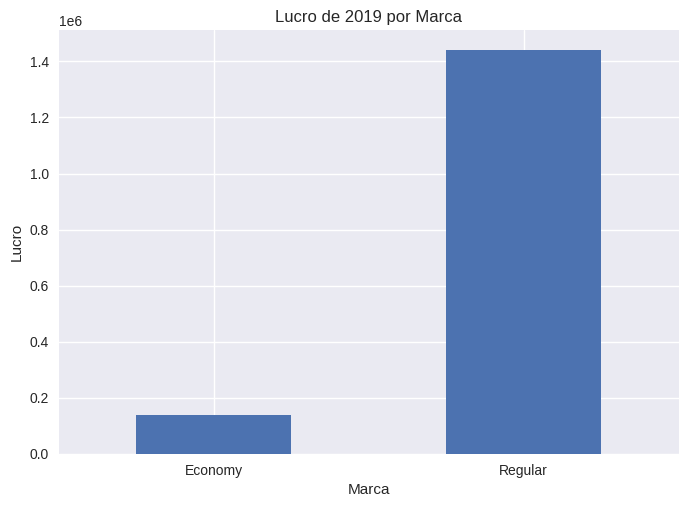

In [54]:
#Lucro de 2009 por classe
df_2009.groupby(df_2009["Classe"])["Lucro"].sum().plot.bar(title= "Lucro de 2019 por Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal")

In [57]:
df['Tempo Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7adbe20d7220>,
 'caps': [<matplotlib.lines.Line2D at 0x7adbe20d51e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7adbe0b4c550>],
 'medians': [<matplotlib.lines.Line2D at 0x7adbe20d7370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7adbe20d47f0>],
 'means': []}

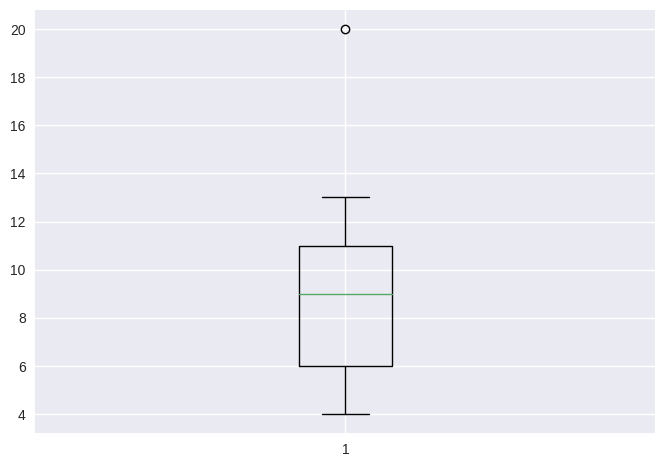

In [61]:
plt.boxplot(df['Tempo Envio'])

(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <BarContainer object of 10 artists>)

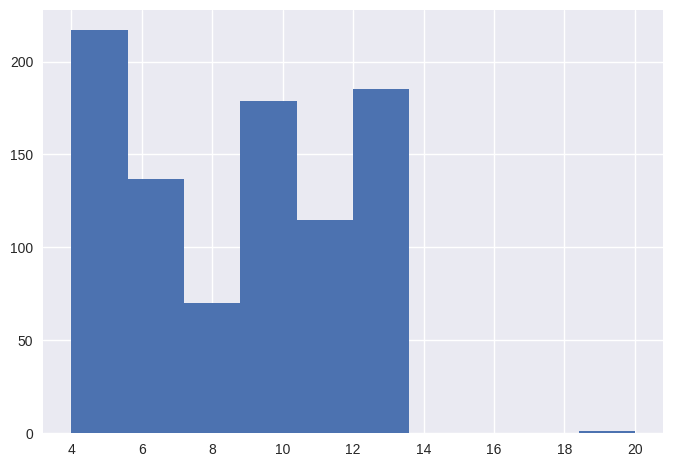

In [62]:
plt.hist(df['Tempo Envio'])

In [63]:
#Ponto fora da curva
df[df['Tempo Envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Dias envio produto,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20 days,20


In [ ]:
#Salvar o dataframe resultado em csv
df.to_csv("df_vendas_novo.csv", index=False)